In [1]:
%load_ext autoreload
%autoreload 2
from NBT import *

In [2]:
# Gene SYMBOL 2 ENSG
Symbol2ENSG, Uniprot2ENSG, ENSP2ENSG, Entrez2ENSG = LoadIDMapping()
ENSG2Symbol = {}
for k,v in Symbol2ENSG.items():
    ENSG2Symbol[v] = k

In [3]:
# Load Tissue Exp Dat
GTExExp = pd.read_csv("../dat/GTEx_SMTS_Gene_Exp.tsv", delimiter="\t", index_col="Name")
GTExExp.head(2)

,Description,Skin,Cervix Uteri,Uterus,Adipose Tissue,Heart,Thyroid,Small Intestine,Kidney,Prostate,...,Blood,Testis,Fallopian Tube,Breast,Salivary Gland,Adrenal Gland,Pituitary,Bone Marrow,Nerve,Stomach
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000186092,OR4F5,0.025918,0.030203,0.015057,0.027855,0.053155,0.027711,0.033825,0.045193,0.025381,...,0.012020,0.022574,0.010149,0.027705,0.02373,0.036714,0.018040,NaN,0.023290,0.035101
ENSG00000235249,OR4F29,0.020343,0.007111,0.013783,0.021115,0.035537,0.023421,0.023829,0.023720,0.020852,...,0.012044,0.015739,0.014486,0.022287,0.01979,0.026544,0.015122,NaN,0.022551,0.023630


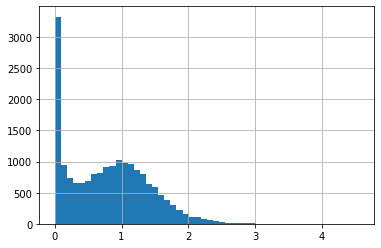

In [4]:
GTExExp["Brain"].hist(bins=50)

In [5]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>0.4].index
print(len(Brain_exp_genes))
brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
print(len(brain_subPPI.vs))

12421


NameError: name 'subPrePPI' is not defined

In [ ]:
noBrain_exp_genes = GTExExp[GTExExp["Brain"]<1].index
print(len(noBrain_exp_genes))
non_brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=noBrain_exp_genes))
print(len(non_brain_subPPI.vs))

In [ ]:
PrePPI, unmappedUniprot = LoadNetworkPrePPI(Uniprot2ENSG)

In [ ]:
subPrePPI = PrePPI.subgraph_edges(PrePPI.es.select(weight_ge=1e7))
print(len(subPrePPI.vs))
print(np.mean(subPrePPI.degree()))

In [ ]:
print(len(subPrePPI.es))

In [ ]:
subPrePPI = PrePPI.subgraph_edges(PrePPI.es.select(weight_ge=1e6))
print(len(subPrePPI.vs))
print(np.mean(subPrePPI.degree()))

In [ ]:
print(np.mean(subPrePPI.degree()))
plt.hist(subPrePPI.degree(), bins=1000, density=1)
plt.xlim((0,100))
plt.show()

In [ ]:
RGN = LoadPsychencodeRGN(Symbol2ENSG)

In [ ]:
print(len(RGN.vs))
print(np.mean(RGN.degree()))

In [ ]:
subRGN = RGN.subgraph_edges(RGN.es.select(weight_ge=0.3))
print(len(subRGN.vs))
print(np.mean(subRGN.degree()))

In [ ]:
#df = pd.read_csv("/Users/jiayao/Work/spark/dat/SFARI-Gene_genes_05-06-2019release_05-22-2019export.csv")
#ASD_Core = df[df["gene-score"].isin([1.0, 2.0])]["gene-symbol"].values
SCZ_high_conf_gene = pd.read_csv("../dat/network/psychencode/INT-17_SCZ_High_Confidence_Gene_List.csv")
SCZ_Core = SCZ_high_conf_gene["sczgenenames"].values
GeneTest = ProcessLoadGeneTestAndPlot("../dat/GWAS/GeneTest/scz.genetest.tsv", SCZ_Core)

In [ ]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, subPrePPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)
PairwiseTest(SCZdegreesEff, N=6)

In [ ]:
GeneTest_brain = GeneTest

In [ ]:
SCZdegreesEff_brain = MapGenes2NetWork(GeneTest, brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff_brain, N=6)
PairwiseTest(SCZdegreesEff_brain, N=6)

In [ ]:
SCZdegreesEff_brain = MapGenes2NetWork(GeneTest, non_brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff_brain, N=6)
PairwiseTest(SCZdegreesEff_brain, N=6)

In [ ]:
GWAS_SCZ_Core = GeneTest[GeneTest["ZSTAT"]>7].index
SCZdegreesEff2 = MapGenes2NetWork(GeneTest, subPrePPI, GWAS_SCZ_Core, Symbol2ENSG, ENSG2Symbol)

In [ ]:
PlotDegreeDecay(SCZdegreesEff2, N=6)
PairwiseTest(SCZdegreesEff2, N=6)

In [ ]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, subRGN, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)
PairwiseTest(SCZdegreesEff, N=6)

##### Check high z-score genes

In [6]:
SCZ_highZ = GeneTest[GeneTest["ZSTAT"]>2]
SCZ_highZ.shape

NameError: name 'GeneTest' is not defined

In [7]:
#SCZdegreesEff = MapGenes2NetWork(GeneTest, subPrePPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6, Zcut=2)
PairwiseTest(SCZdegreesEff, N=6)

NameError: name 'SCZdegreesEff' is not defined

In [ ]:
#subRGN
g1, g2 = [Symbol2ENSG[x] for x in SCZ_Core[:2]]

In [ ]:
ENSID2IDX = {}
for idx, v in enumerate(subPrePPI.vs):
    ENSID2IDX[v["ENSGID"]] = idx
n1, n2 = ENSID2IDX[g1], ENSID2IDX[g2]

In [ ]:
CoreGenePLen = []
for g1, g2 in itertools.combinations(SCZ_Core, r=2):
    try:
        g1, g2 = Symbol2ENSG[g1], Symbol2ENSG[g2]
        n1, n2 = ENSID2IDX[g1], ENSID2IDX[g2]
    except:
        continue
    pLen = subPrePPI.shortest_paths_dijkstra(n1, n2, mode="ALL")[0][0]
    CoreGenePLen.append(pLen)

In [ ]:
CoreGenePLen = [x for x in CoreGenePLen if x < 100]
print(np.mean(CoreGenePLen))
bins = np.arange(0, max(CoreGenePLen)+1, 1)
plt.hist(CoreGenePLen, bins=bins, align='left')
plt.show()

In [ ]:
len(SCZ_Core)

In [ ]:
random_nodes = np.random.choice(subPrePPI.vs, len(SCZ_Core))
RDMGenePLen = []
for n1, n2 in itertools.combinations(random_nodes, r=2):
    pLen = subPrePPI.shortest_paths_dijkstra(n1, n2, mode="ALL")[0][0]
    RDMGenePLen.append(pLen)

In [ ]:
RDMGenePLen = [x for x in RDMGenePLen if x < 100]
print(np.mean(RDMGenePLen))
bins = np.arange(0, max(RDMGenePLen)+1, 1)
plt.hist(RDMGenePLen, bins=bins, align='left')
plt.show()

In [ ]:
ConnectivityTest(subPrePPI, SCZ_Core, Symbol2ENSG)

In [ ]:
ConnectivityTest(subPrePPI, GWAS_SCZ_Core, Symbol2ENSG)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, SCZ_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 7
ZCUT_GENEs = list(set(GeneTest[GeneTest
                               
                               
                               
                               
                               
                               
                                    jhh l m        xccccc
                               
                                              "ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = Co mpareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 6
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 5
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 4
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 3
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 2
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
Zcut = 1
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, GWAS_SCZ_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subRGN, SCZ_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subRGN, GWAS_SCZ_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

### ASD

In [ ]:
df = pd.read_csv("/Users/jiayao/Work/spark/dat/SFARI-Gene_genes_05-06-2019release_05-22-2019export.csv")
ASD_Core = df[df["gene-score"].isin([1.0, 2.0])]["gene-symbol"].values
GeneTest = ProcessLoadGeneTestAndPlot("../dat/GWAS/GeneTest/asd.genetest.tsv", ASD_Core)
ASDdegreesEff = MapGenes2NetWork(GeneTest, subPrePPI, ASD_Core, Symbol2ENSG, ENSG2Symbol)

In [ ]:
PlotDegreeDecay(ASDdegreesEff, N=6)
PairwiseTest(ASDdegreesEff, N=6)

In [ ]:
PlotDegreeDecay(ASDdegreesEff, N=6, Zcut = 1)
PairwiseTest(ASDdegreesEff, N=6)

In [ ]:
GWAS_Core = GeneTest[GeneTest["ZSTAT"]>3].index
ASDdegreesEff2 = MapGenes2NetWork(GeneTest, subPrePPI, GWAS_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(ASDdegreesEff2, N=6)
PairwiseTest(ASDdegreesEff2, N=6)

In [ ]:
ASDdegreesEff = MapGenes2NetWork(GeneTest, subRGN, ASD_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(ASDdegreesEff, N=6)
PairwiseTest(ASDdegreesEff, N=6)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ASD_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, GWAS_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subRGN, ASD_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subRGN, GWAS_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [ ]:
ConnectivityTest(subPrePPI, ASD_Core, Symbol2ENSG)

In [ ]:
ConnectivityTest(subPrePPI, GWAS_Core, Symbol2ENSG)

In [ ]:
brain_hbnet_fil = '../dat/network/brain_top.gz'
brain_hbnet, unmap_brain_hbnet = LoadHumanBase(brain_hbnet_fil, Entrez2ENSG, pcut = 0.5)

In [ ]:
subbrain_hbnet = brain_hbnet.subgraph_edges(brain_hbnet.es.select(weight_ge=0.5))
print(len(subbrain_hbnet.vs))
print(np.mean(subbrain_hbnet.degree()))

In [ ]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, subbrain_hbnet, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6, Zcut=None)
PairwiseTest(SCZdegreesEff, N=6)

In [ ]:
heart_hbnet_fil = '../dat/network/heart_top.gz'
heart_hbnet, unmap_heart_hbnet = LoadHumanBase(heart_hbnet_fil, Entrez2ENSG, pcut = 0.5)

In [ ]:
subheart_hbnet = heart_hbnet.subgraph_edges(heart_hbnet.es.select(weight_ge=0.5))
print(len(subheart_hbnet.vs))
print(np.mean(subheart_hbnet.degree()))

In [ ]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, subheart_hbnet, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6, Zcut=None)
PairwiseTest(SCZdegreesEff, N=6)

In [ ]:
lung_hbnet_fil = '../dat/network/lung_top.gz'
lung_hbnet, unmap_lung_hbnet = LoadHumanBase(lung_hbnet_fil, Entrez2ENSG, pcut = 0.5)

In [ ]:
sublung_hbnet = lung_hbnet.subgraph_edges(lung_hbnet.es.select(weight_ge=0.5))
print(len(sublung_hbnet.vs))
print(np.mean(sublung_hbnet.degree()))

In [ ]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, sublung_hbnet, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6, Zcut=None)
PairwiseTest(SCZdegreesEff, N=6)

In [ ]:
ENSID2IDX = {}
for idx, v in enumerate(subPrePPI.vs):
    ENSID2IDX[v["ENSGID"]] = idx
    
def symbol2node(symbol):
    try:
        ensid = Symbol2ENSG[symbol]
        node = ENSID2IDX[ensid]
    except:
        node = None
    return node
    
RES = {}
for gene in SCZ_Core:
    node = symbol2node(gene)
    if node == None:
        continue
    closest_nodes = []
    closest_dist = np.inf
    for _gene in SCZ_Core:
        _node = symbol2node(_gene)
        if _node != None and node != _node:
            pLen = subPrePPI.shortest_paths_dijkstra(node, _node, mode="ALL")[0][0]
            if pLen < closest_dist:
                closest_dist = pLen
                closest_nodes = [_gene]
            elif pLen == closest_dist:
                closest_nodes.append(_gene)
    RES[gene] = (closest_dist, closest_nodes)

In [ ]:
print(SCZ_Core[:10])

In [ ]:
RES["PEX10"]

In [ ]:
print(len(RES))
dists = [RES[x][0] for x in SCZ_Core if x in RES]
dists2 = [x for x in dists if x<100]
print(len(dists), len(dists2))
plt.hist(dists2)

In [ ]:
Clusters = []
MAX_DIST = 1
for gene in RES.keys():
    if RES[gene][0] > MAX_DIST:
        continue
    genes = [gene] + RES[gene][1]
    genes = set(genes)
    FLAG_NEW_CLUST = True
    for cluster in Clusters:
        #print(cluster)
        if genes.intersection(cluster):
            cluster = cluster.union(genes)
            FLAG_NEW_CLUST = False
    if FLAG_NEW_CLUST:
        Clusters.append(genes)
    #merge_cluster(Clusters, i, j)

In [ ]:
for clust in Clusters:
    print(clust)

In [ ]:
Z_cut = 5
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Z_cut].index.values.tolist() + SCZ_Core.tolist()))
print(len(ZCUT_GENEs))

In [ ]:
RES2 = {}
for gene in ZCUT_GENEs:
    node = symbol2node(gene)
    if node == None:
        continue
    closest_nodes = []
    closest_dist = np.inf
    for _gene in ZCUT_GENEs:
        _node = symbol2node(_gene)
        if _node != None and node != _node:
            pLen = subPrePPI.shortest_paths_dijkstra(node, _node, mode="ALL")[0][0]
            if pLen < closest_dist:
                closest_dist = pLen
                closest_nodes = [_gene]
            if pLen == closest_dist:
                closest_nodes.append(_gene)
    RES2[gene] = (closest_dist, closest_nodes)

In [ ]:
print(len(RES2))
dists = [RES2[x][0] for x in ZCUT_GENEs if x in RES2]
dists2 = [x for x in dists if x<100]
print(len(dists), len(dists2))
plt.hist(dists2)

In [ ]:
Clusters = []
MAX_DIST = 1
for gene in RES2.keys():
    if RES2[gene][0] > MAX_DIST:
        continue
    genes = [gene] + RES2[gene][1]
    genes = set(genes)
    FLAG_NEW_CLUST = True
    for cluster in Clusters:
        #print(cluster)
        if genes.intersection(cluster):
            cluster = cluster.union(genes)
            FLAG_NEW_CLUST = False
    if FLAG_NEW_CLUST:
        Clusters.append(genes)
    #merge_cluster(Clusters, i, j)

In [ ]:
for clust in Clusters:
    print(clust)

In [ ]:
RES1 = Clusters_step1(SCZ_Core, subPrePPI, Symbol2ENSG)

In [ ]:
Clusters = Clusters_step2(RES1)
for clust in Clusters:
    print(clust)

In [ ]:
"SNRNP35" in SCZ_Core

In [ ]:
Z_cut = 5
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Z_cut].index.values.tolist() + SCZ_Core.tolist()))
print(len(ZCUT_GENEs))
RES2 = Clusters_step1(ZCUT_GENEs, subPrePPI, Symbol2ENSG)

In [ ]:
Clusters = Clusters_step2(RES2)
for clust in Clusters:
    print(clust)

In [ ]:
for gene in SCZ_Core:
    if gene == gene:
        print(gene)

In [ ]:
for gene in Clusters[1]:
    print(gene)

In [ ]:
Z_cut = 4
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Z_cut].index.values.tolist() + SCZ_Core.tolist()))
print(len(ZCUT_GENEs))
RES3 = Clusters_step1(ZCUT_GENEs, subPrePPI, Symbol2ENSG)

In [ ]:
Clusters = Clusters_step2(RES3)
for clust in Clusters:
    print(clust)

In [ ]:
Z_cut = 3
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Z_cut].index.values.tolist() + SCZ_Core.tolist()))
print(len(ZCUT_GENEs))
RES4 = Clusters_step1(ZCUT_GENEs, subPrePPI, Symbol2ENSG)

In [ ]:
Clusters = Clusters_step2(RES4)
for clust in Clusters:
    print(clust)

In [ ]:
for gene in Clusters[0]:
    print(gene)

In [ ]:
from igraph import *
import cairocffi 
import cairo

In [ ]:
nodes = GeneSymbol2nodes(subPrePPI, SCZ_Core, Symbol2ENSG)
g = subPrePPI.subgraph(nodes)

g.vs["color"] = "orange" #modify color of vertex as orange
d = g.degree() # get degree of vertices
layout = g.layout("fr") # set layout as Fruchterman-Reingold layout

cl = g.clusters() 
new_cl = Clustering([c for c in cl if len(c)>2])
lcc = cl.giant() # find largest connected compounet
drawing.plot(new_cl, 
             layout = layout,
             vertex_size = 8, 
             bbox=(400,400), 
             margin = 10) # plot graph as vertex size proportion of eigen centrality.

In [ ]:
print(cl)

In [ ]:
ENSG2Symbol = {v: k for k,v in Symbol2ENSG.items()}
ENSID2IDX = {}
IDX2SYMBOL = {}
for idx, v in enumerate(g.vs):
    ENSID2IDX[v["ENSGID"]] = idx
    IDX2SYMBOL[idx] = ENSG2Symbol[v["ENSGID"]]

In [ ]:
for c in cl:
    if len(c) > 1:
        c = [IDX2SYMBOL[x] for x in c]
        print(c)

In [ ]:
"STAT6" in SCZ_Core

In [ ]:
RES1["STAT6"]

In [ ]:
Clusters = Clusters_step2(RES1)
for clust in Clusters:
    print(clust)

In [ ]:
Z_cut = 3
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Z_cut].index.values.tolist() + SCZ_Core.tolist()))
nodes = GeneSymbol2nodes(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
g = subPrePPI.subgraph(nodes)
cl = g.clusters() 
ENSG2Symbol = {v: k for k,v in Symbol2ENSG.items()}
ENSID2IDX = {}
IDX2SYMBOL = {}
for idx, v in enumerate(g.vs):
    ENSID2IDX[v["ENSGID"]] = idx
    IDX2SYMBOL[idx] = ENSG2Symbol[v["ENSGID"]]
for c in cl:
    if len(c) > 1:
        c = [IDX2SYMBOL[x] for x in c]
        print(c)

In [ ]:
for Zcut in [7,6,5,4,3,2]:
    ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
    nodes = GeneSymbol2nodes(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    g = subPrePPI.subgraph(nodes)
    cl = g.clusters() 
    ENSG2Symbol = {v: k for k,v in Symbol2ENSG.items()}
    ENSID2IDX = {}
    IDX2SYMBOL = {}
    for idx, v in enumerate(g.vs):
        ENSID2IDX[v["ENSGID"]] = idx
        IDX2SYMBOL[idx] = ENSG2Symbol[v["ENSGID"]]
    c_size = []
    for c in cl:
        if len(c) > 1:
            c = [IDX2SYMBOL[x] for x in c]
            #print(c)
            c_size.append(len(c))
    plt.hist(c_size, bins=max(c_size))
    plt.show()